In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import pickle

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import streamlit as st

In [2]:
##read from csv
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()
corrdf=df.corr()

print(corrdf)

Cols=corrdf.columns
Rows=corrdf.index

#iterate over rows
for i in range(corrdf.shape[0]):
    #iterate over columns 
    for j in range(corrdf.shape[1]):
        #get cell value
        value = corrdf.iat[i,j] 
        if (i > 0): 
            if (value >= 0.5 and value < 1.0):
                print("Present in column ",Cols[j]," and row ",Rows[i], "Value:",value)
                
                #Scatterplot based on identified parameters
                Plotcol=df[Cols[j]].to_numpy()
                Plotrow=df[Rows[i]].to_numpy()

                plt.scatter(Plotcol, Plotrow)
                plt.xlabel(Cols[j])
                plt.ylabel(Rows[i])
                plt.title(Rows[i] + " vs " + Cols[j])
                plt.show()

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

In [4]:
# Checking for any missing values across the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
## correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot: >

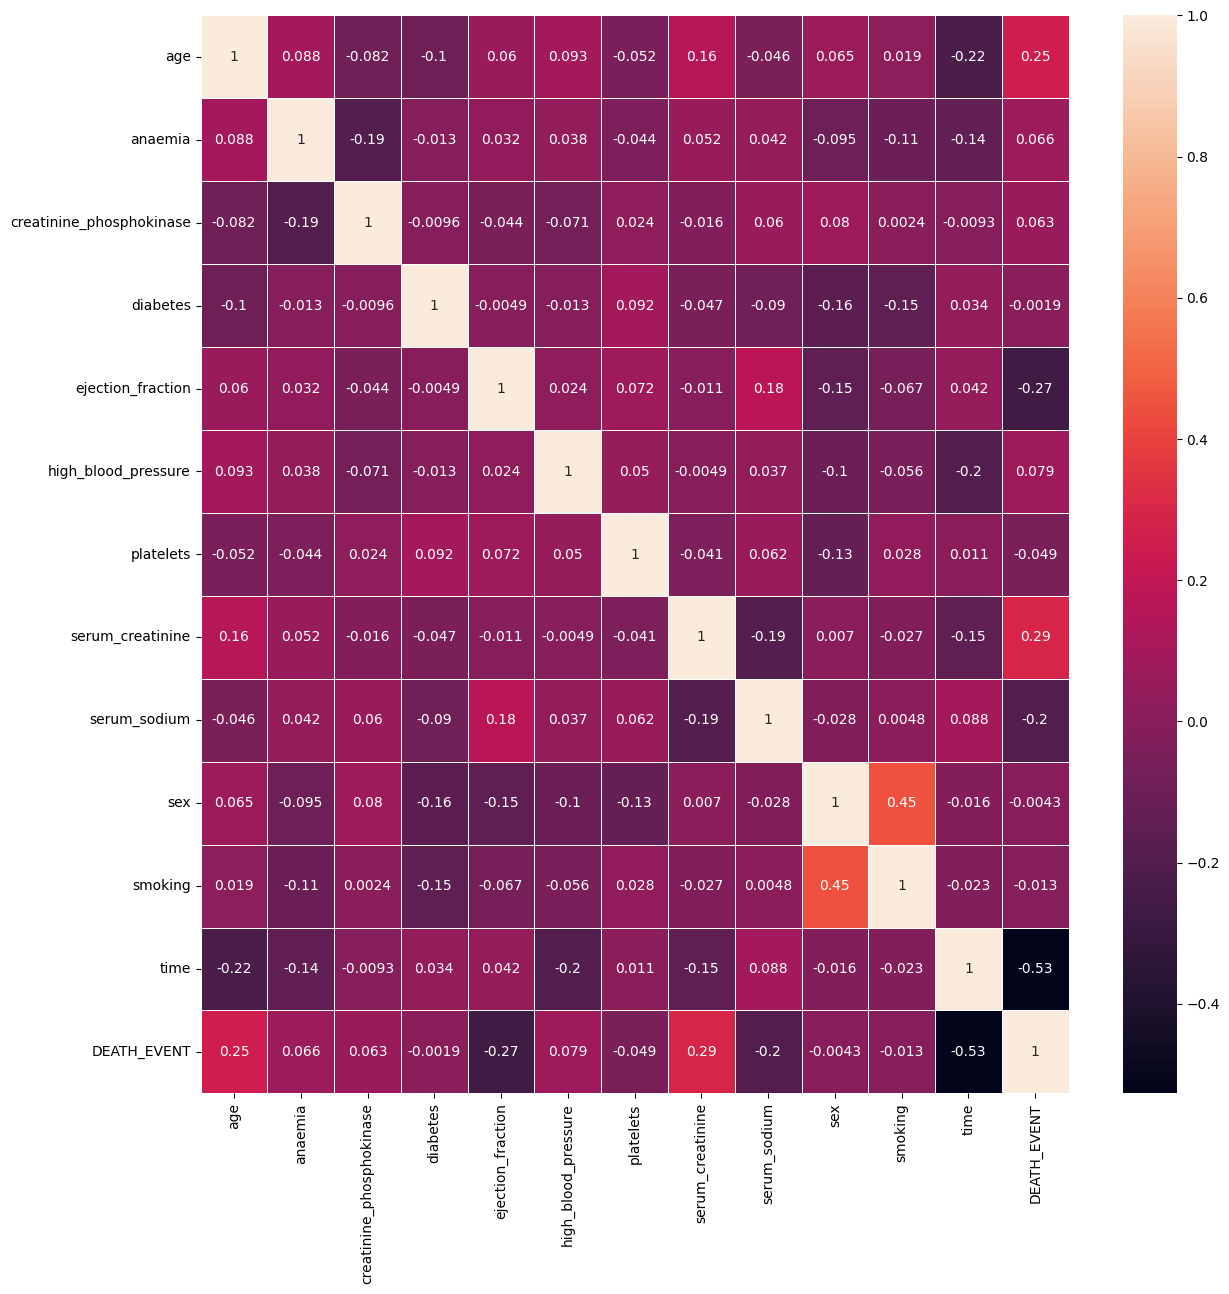

In [6]:
## heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Distribution Of Anaemic patients')

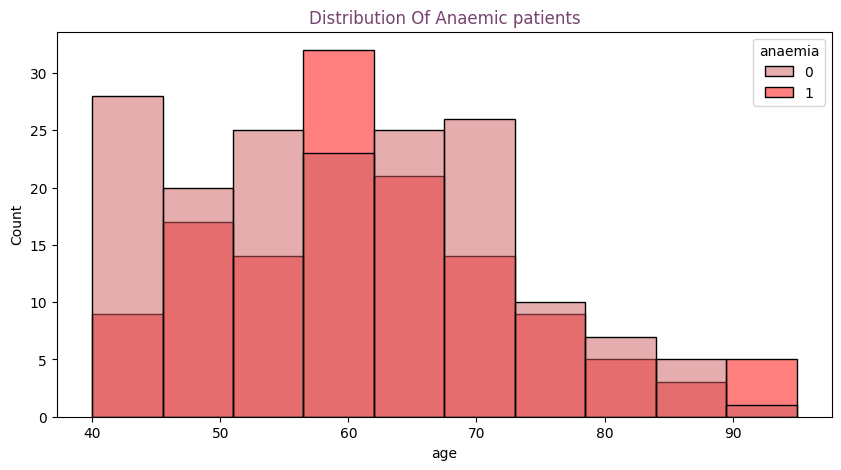

In [46]:
#Evauating age distribution of anaemic patients

cols= ["#CD5C5C","#FF0000"]
plt.figure(figsize=(10,5))
Chart2=sns.histplot(data = df,x = 'age',hue ="anaemia",palette = cols)
Chart2.set_title("Distribution Of Anaemic patients", color="#774571")

Text(0.5, 1.0, 'Distribution Of diabetes patients')

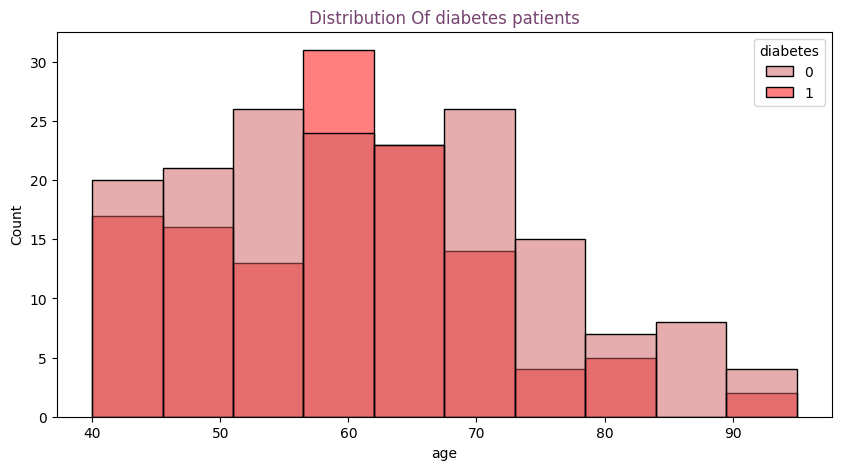

In [47]:
#Evauating age distribution of diabetis patients

cols= ["#CD5C5C","#FF0000"]
plt.figure(figsize=(10,5))
Chart2=sns.histplot(data = df,x = 'age',hue ="diabetes",palette = cols)           
Chart2.set_title("Distribution Of diabetes patients", color="#774571")

Text(0.5, 1.0, 'Distribution Of high_blood_pressure patients')

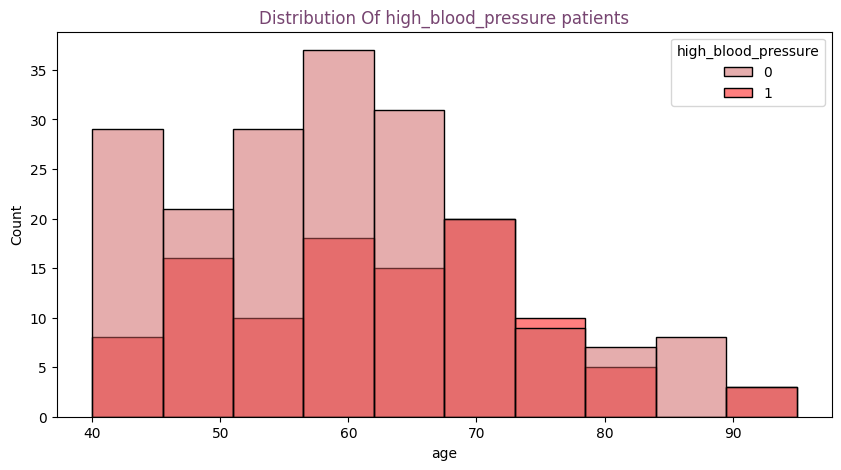

In [48]:
#Evauating age distribution of high_blood_pressure patients

cols= ["#CD5C5C","#FF0000"]
plt.figure(figsize=(10,5))
Chart2=sns.histplot(data = df,x = 'age',hue ="high_blood_pressure",palette = cols)        
Chart2.set_title("Distribution Of high_blood_pressure patients", color="#774571")

Text(0.5, 1.0, 'Distribution Of male and female patients')

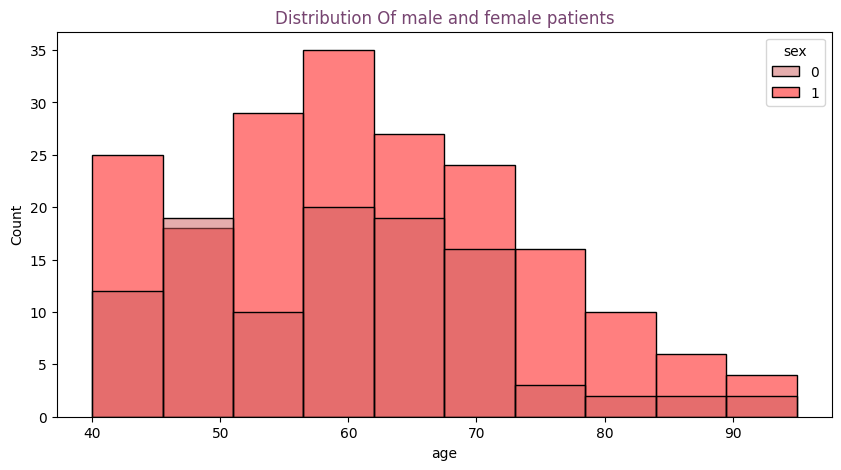

In [49]:
#Evauating age distribution of male and female patients

cols= ["#CD5C5C","#FF0000"]
plt.figure(figsize=(10,5))
Chart2=sns.histplot(data = df,x = 'age',hue ="sex",palette = cols)        
Chart2.set_title("Distribution Of male and female patients", color="#774571")

Text(0.5, 1.0, 'Distribution Of smoking and non smoking patients')

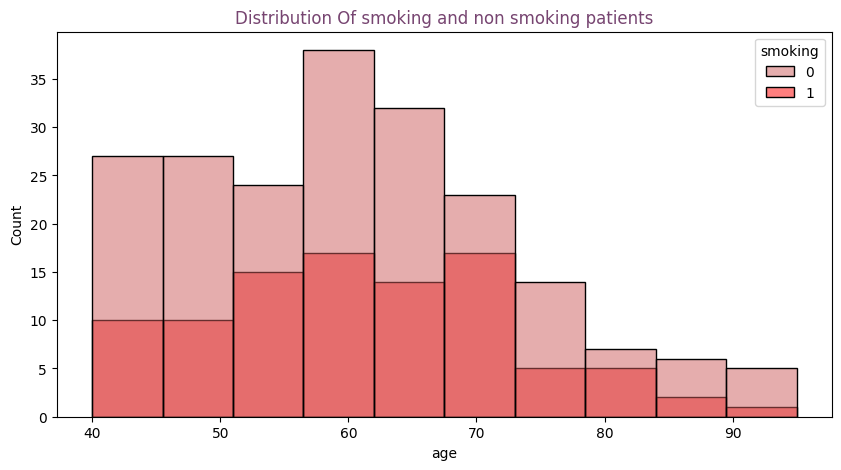

In [50]:
#Evauating age distribution of smoker and non smoker patients

cols= ["#CD5C5C","#FF0000"]
plt.figure(figsize=(10,5))
Chart2=sns.histplot(data = df,x = 'age',hue ="smoking",palette = cols)        
Chart2.set_title("Distribution Of smoking and non smoking patients", color="#774571")

2023-02-24 10:50:11.092 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:11.099 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


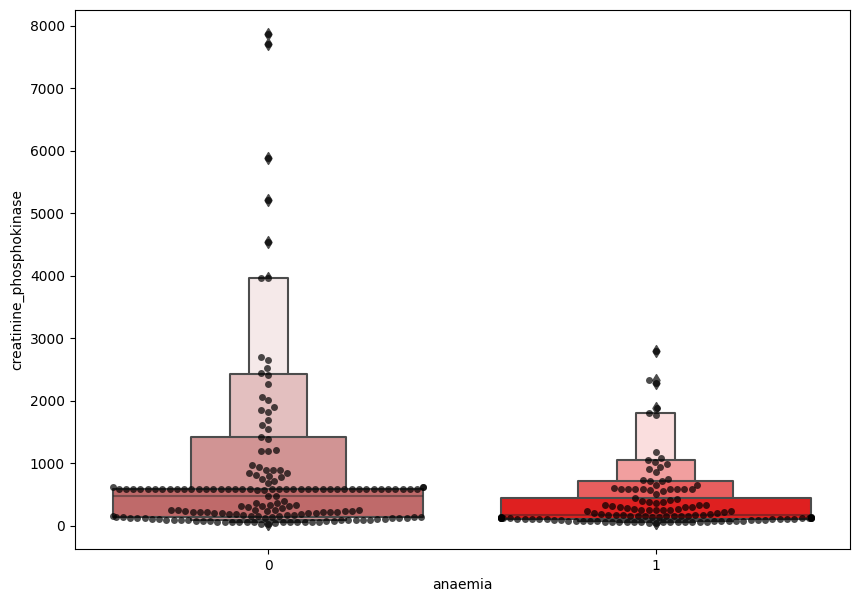

2023-02-24 10:50:12.281 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:12.288 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


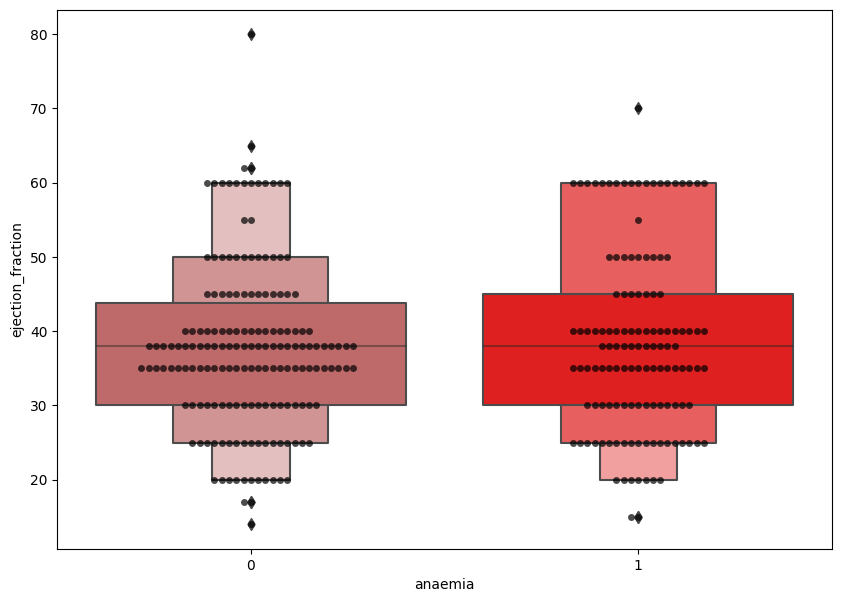

2023-02-24 10:50:13.034 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:13.039 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


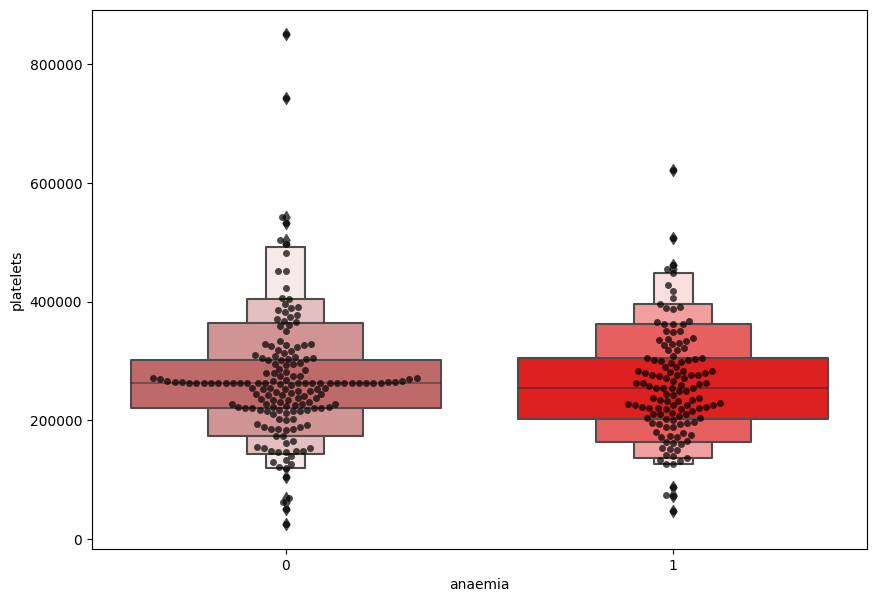

2023-02-24 10:50:13.602 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:13.610 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


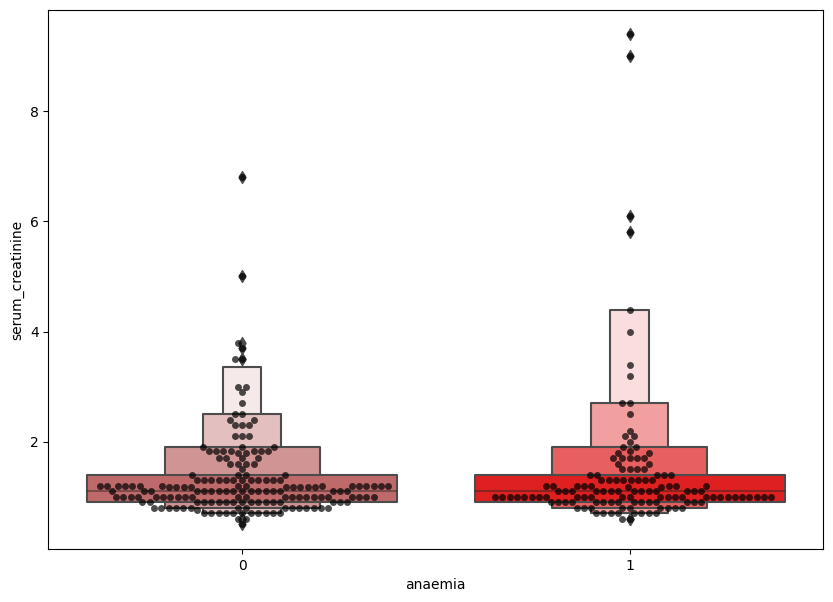

2023-02-24 10:50:14.452 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:14.461 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


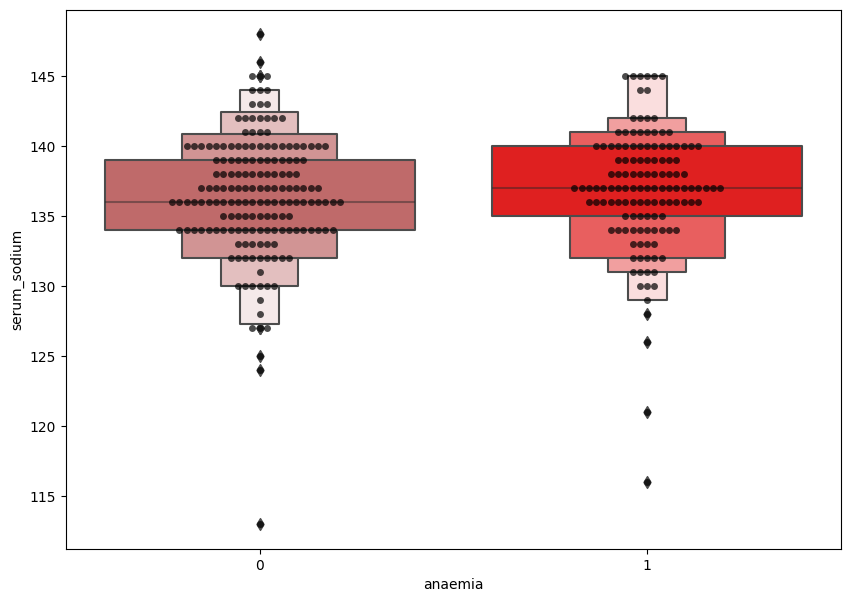

2023-02-24 10:50:15.016 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:15.023 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


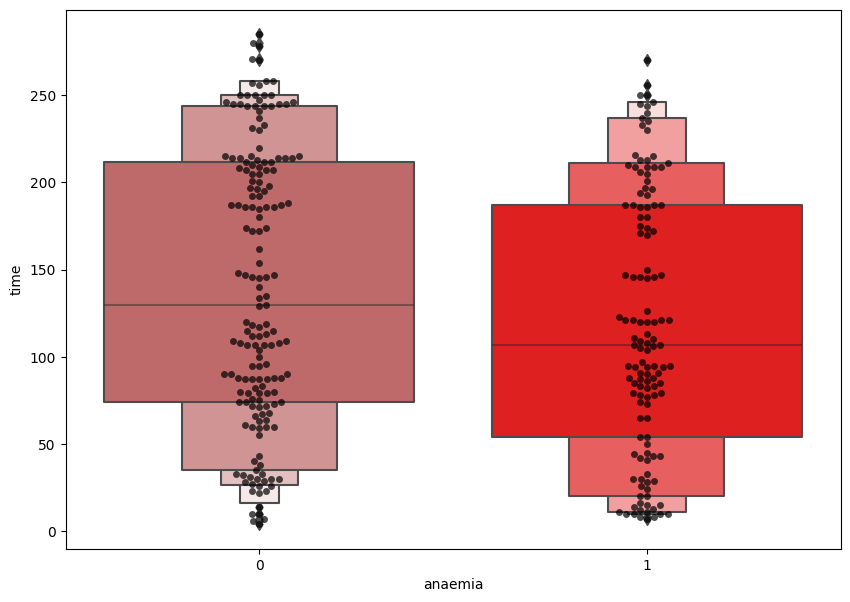

In [12]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["anaemia"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["anaemia"], y=df[i], palette=cols)
    plt.show() 

2023-02-24 10:50:32.230 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:32.236 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


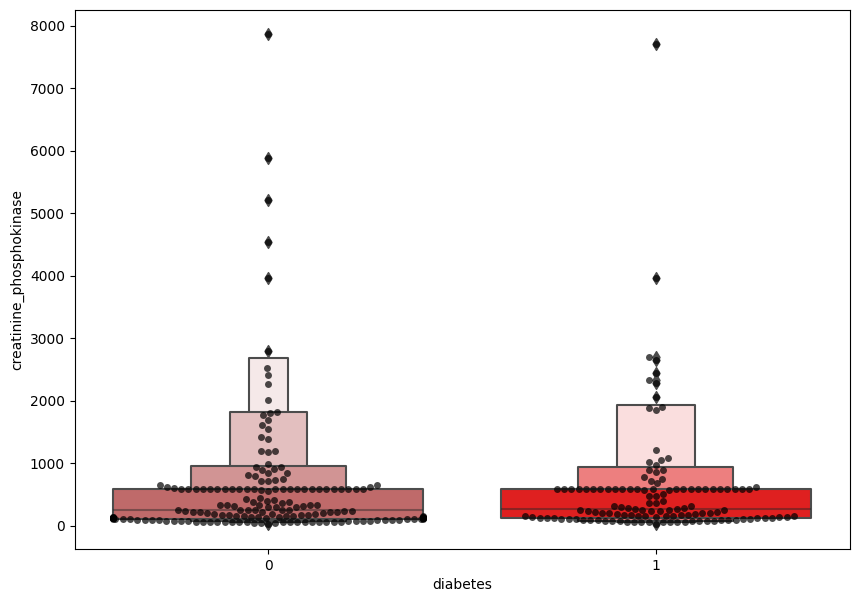

2023-02-24 10:50:33.233 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:33.240 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


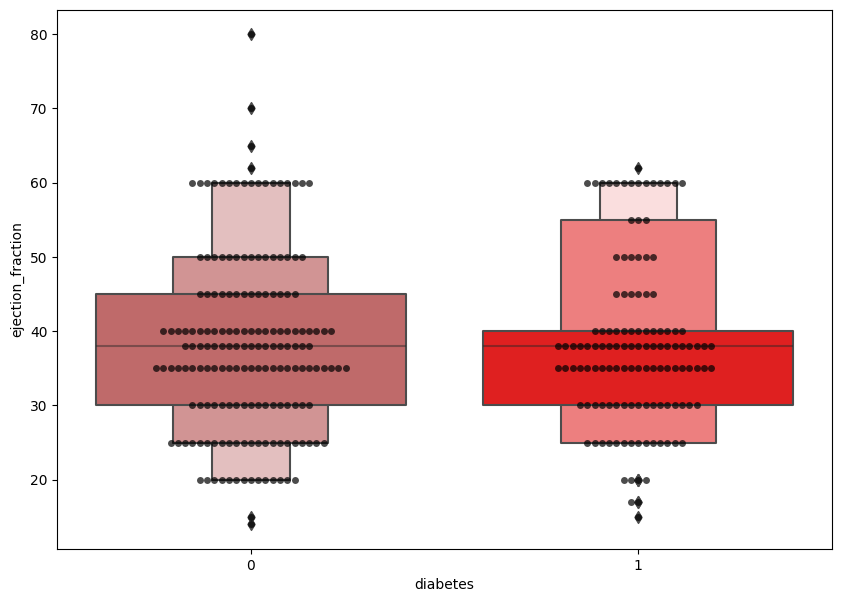

2023-02-24 10:50:33.915 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:33.924 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


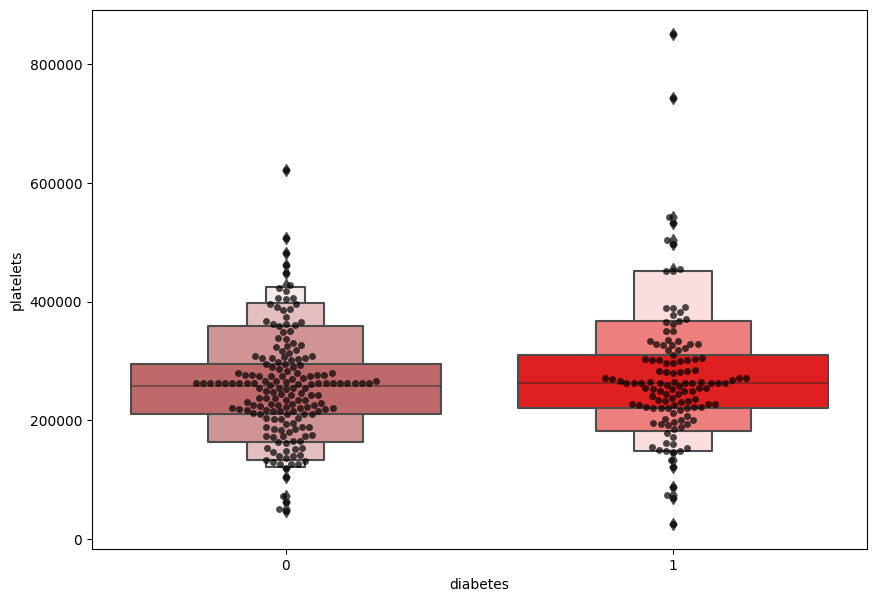

2023-02-24 10:50:34.533 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:34.538 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


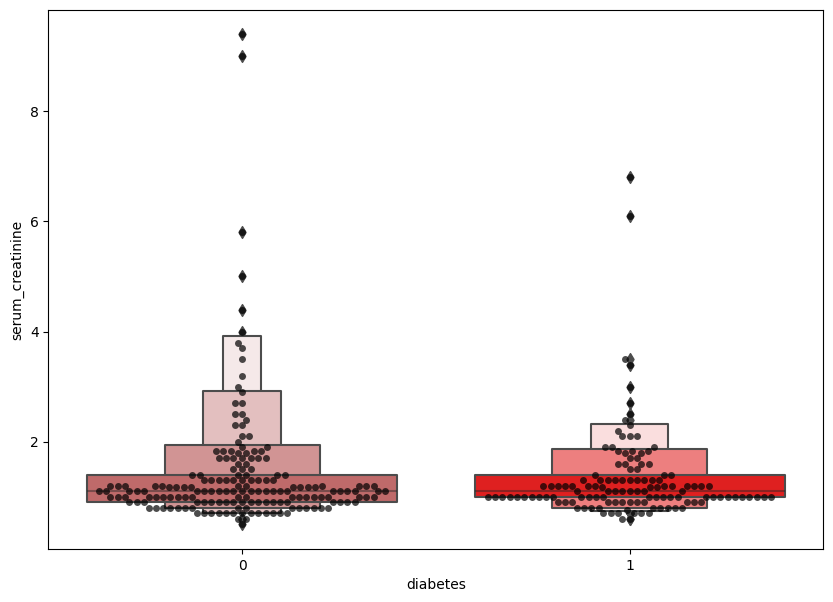

2023-02-24 10:50:35.419 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:35.426 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


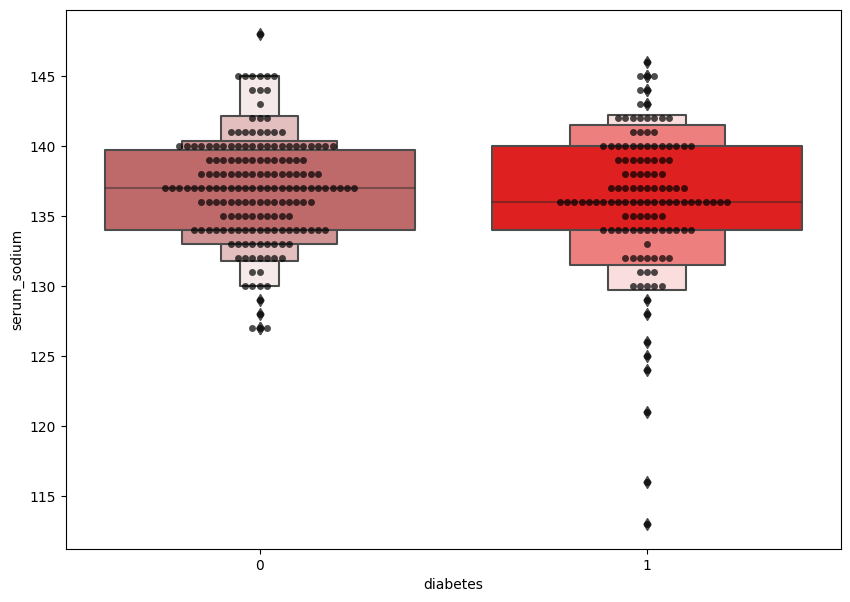

2023-02-24 10:50:35.994 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:36.001 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


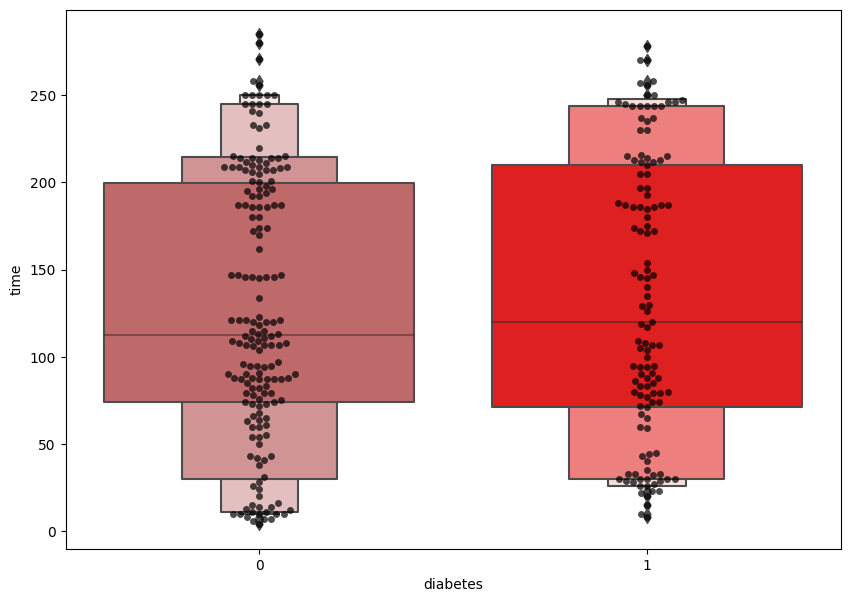

In [13]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["diabetes"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["diabetes"], y=df[i], palette=cols)
    plt.show() 

2023-02-24 10:50:45.015 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:45.021 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


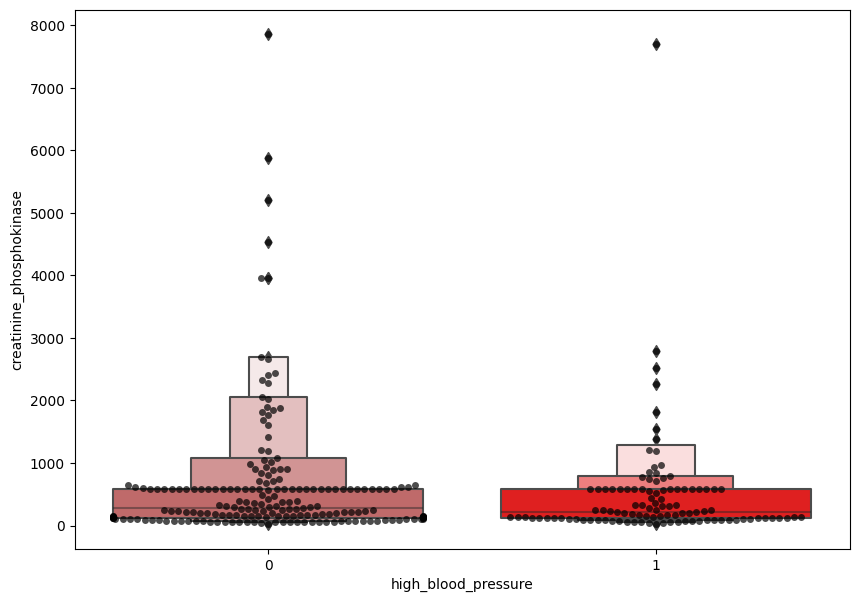

2023-02-24 10:50:45.828 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:45.833 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


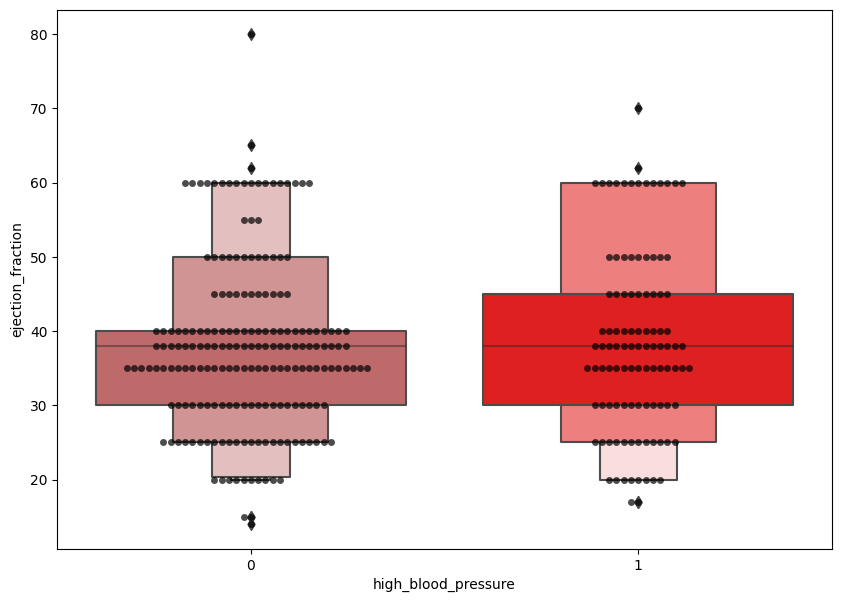

2023-02-24 10:50:46.360 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:46.366 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


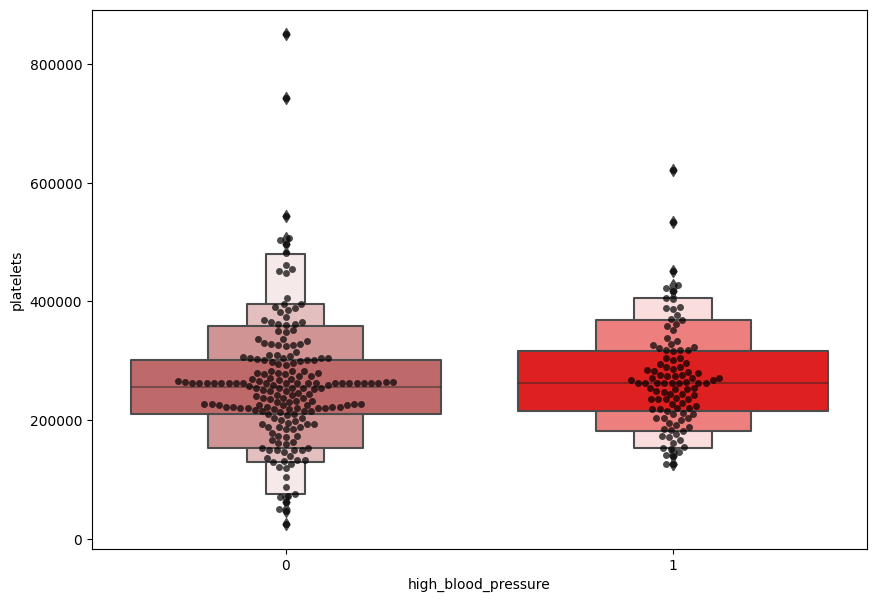

2023-02-24 10:50:46.829 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:46.833 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


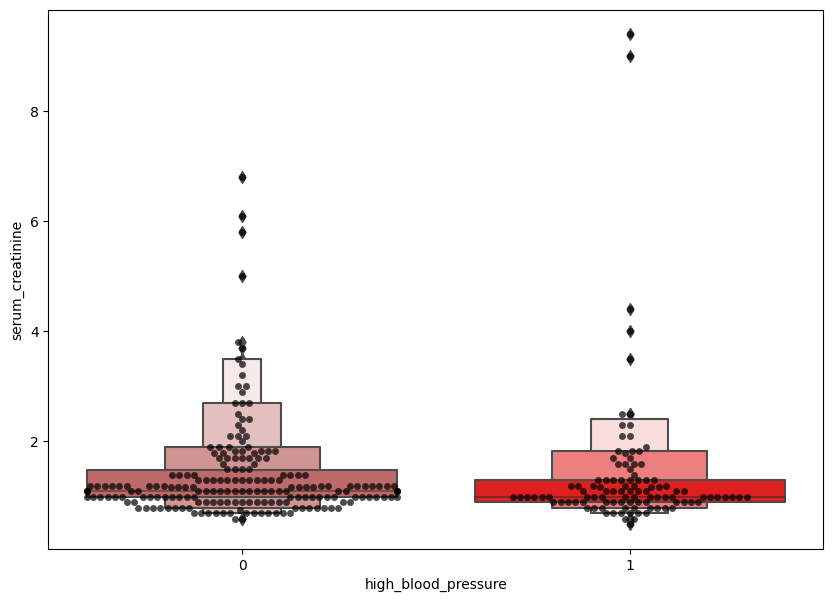

2023-02-24 10:50:47.570 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:47.576 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


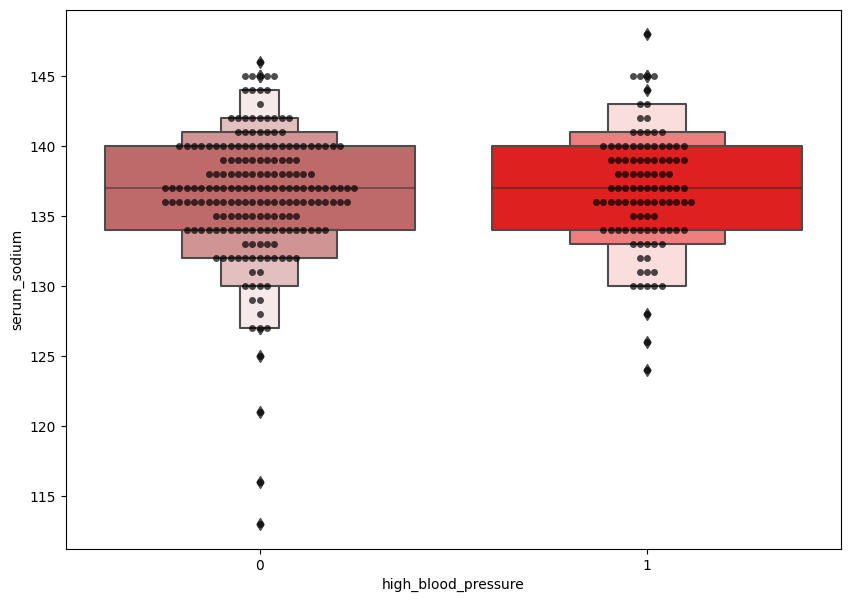

2023-02-24 10:50:48.029 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:48.033 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


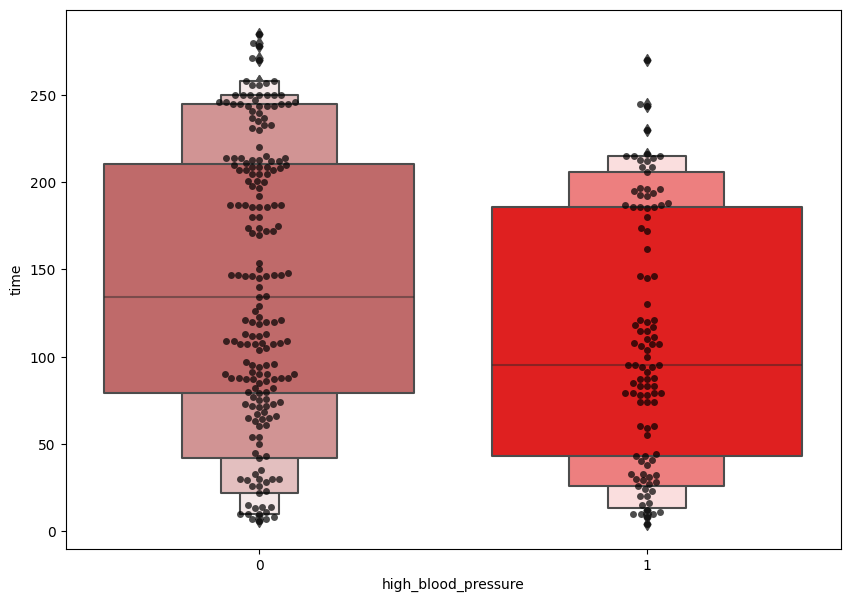

In [14]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["high_blood_pressure"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["high_blood_pressure"], y=df[i], palette=cols)
    plt.show()

2023-02-24 10:50:57.803 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:57.811 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


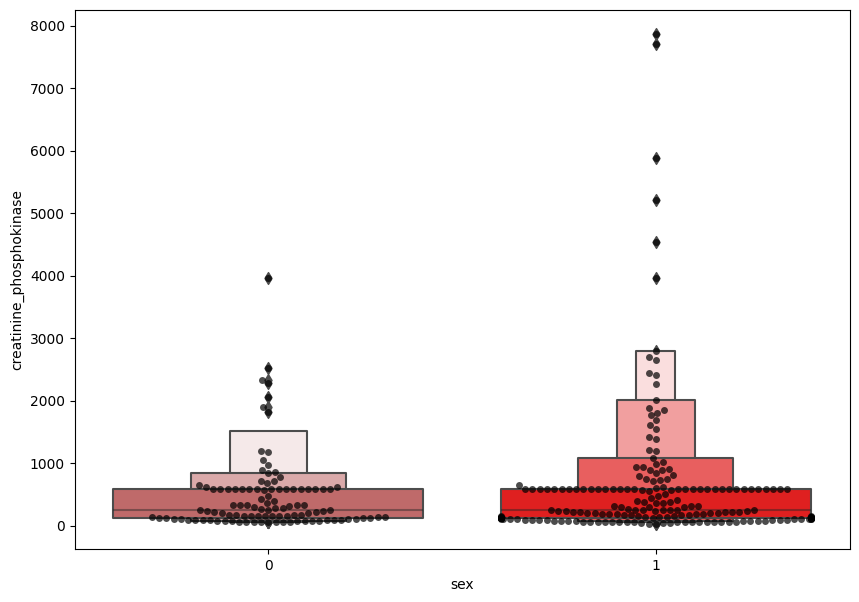

2023-02-24 10:50:58.629 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:58.635 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


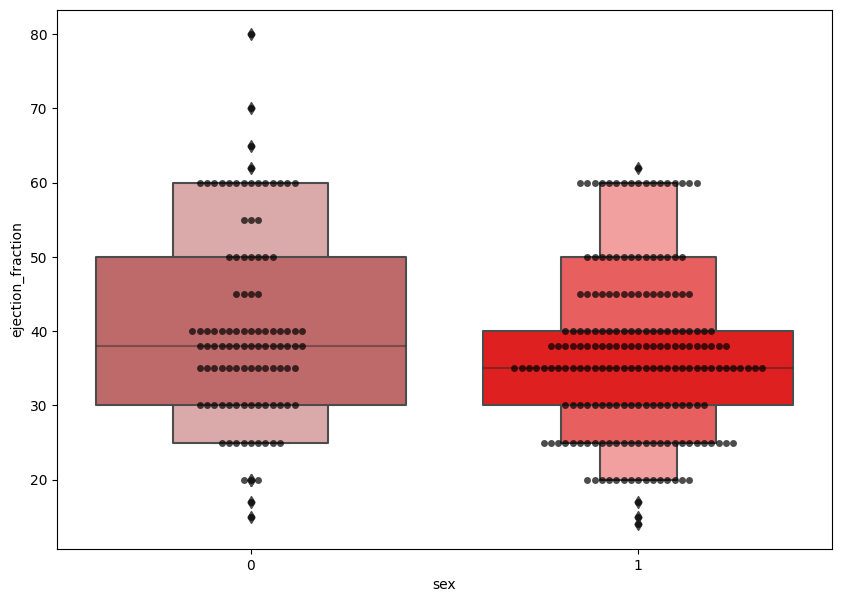

2023-02-24 10:50:59.241 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:59.246 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


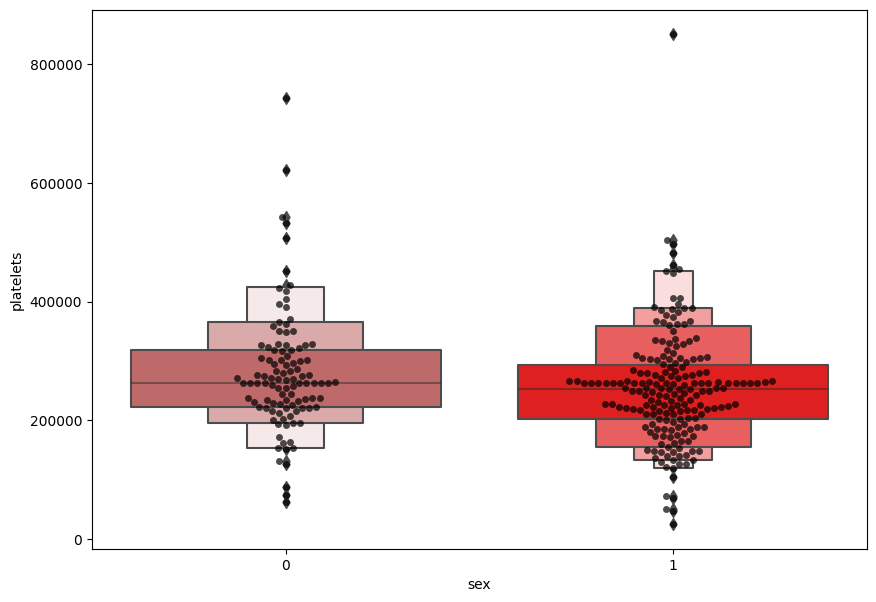

2023-02-24 10:50:59.682 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:50:59.689 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


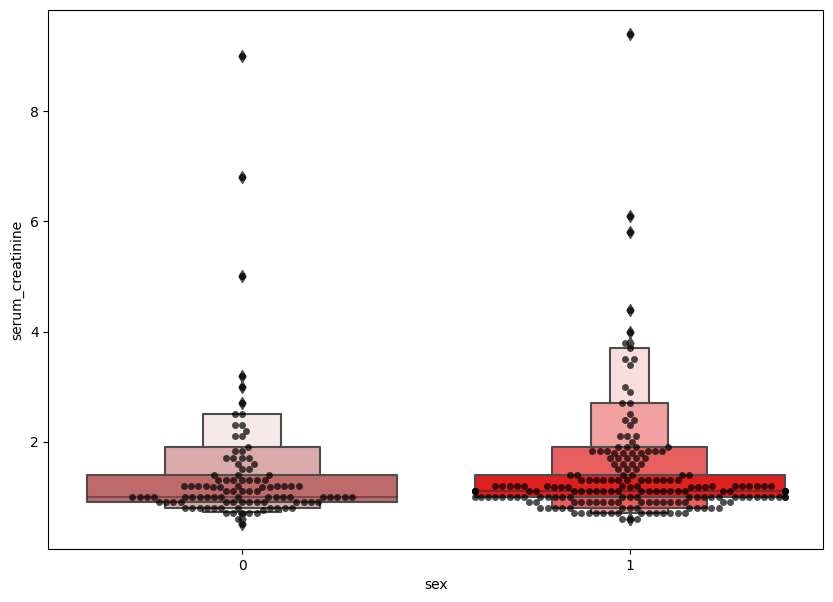

2023-02-24 10:51:00.429 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:00.435 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


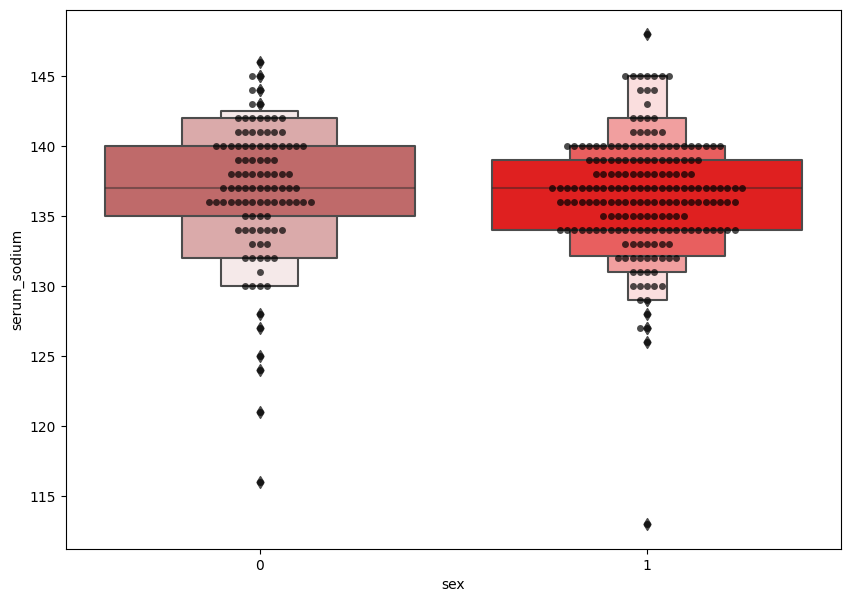

2023-02-24 10:51:00.893 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:00.904 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


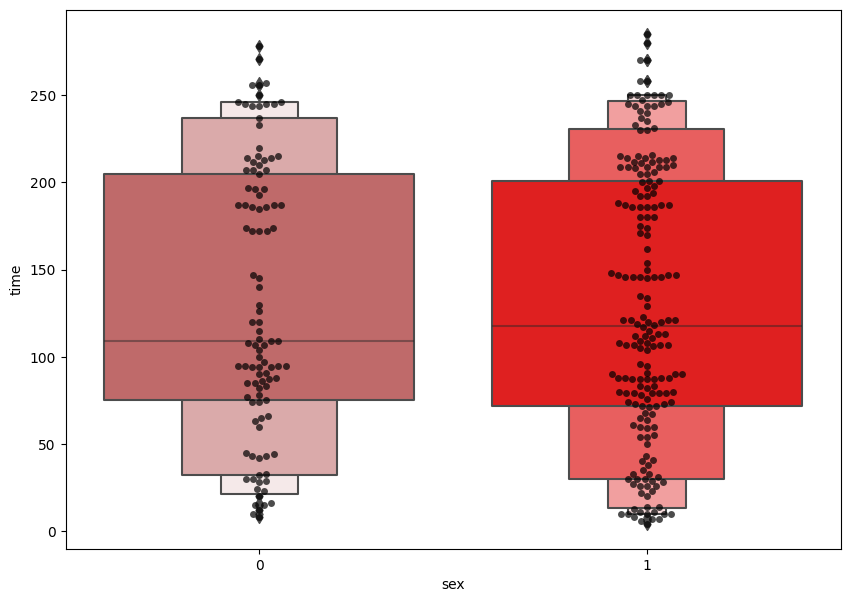

In [15]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["sex"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["sex"], y=df[i], palette=cols)
    plt.show()

2023-02-24 10:51:11.430 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:11.437 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


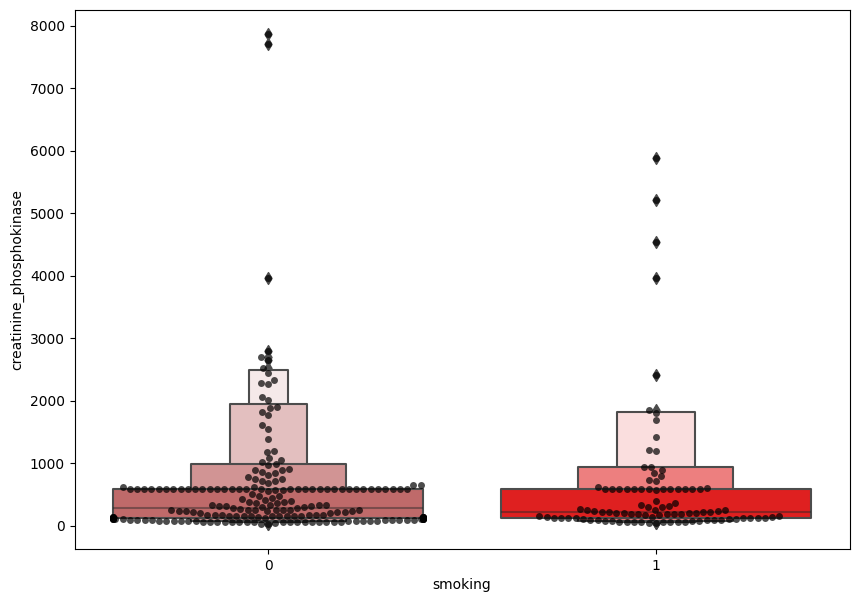

2023-02-24 10:51:12.254 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:12.259 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


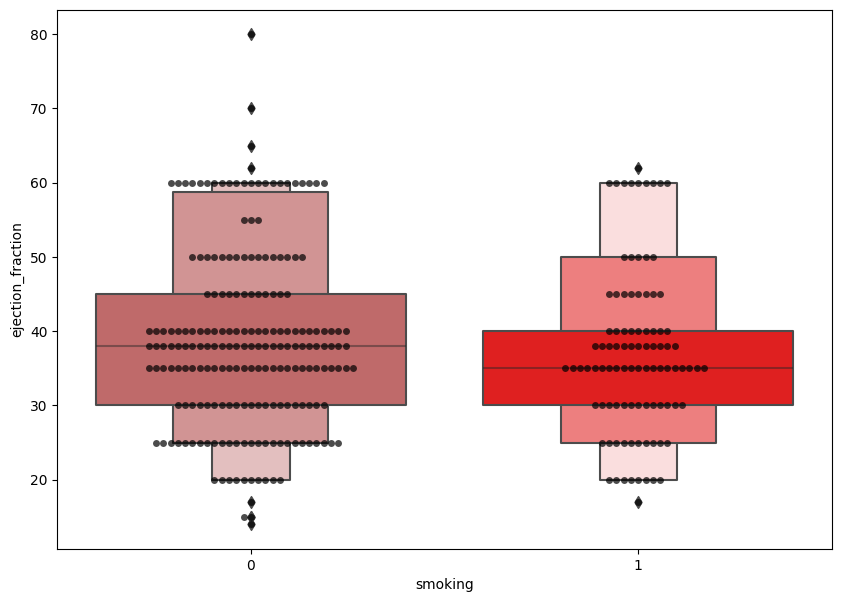

2023-02-24 10:51:12.801 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:12.806 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


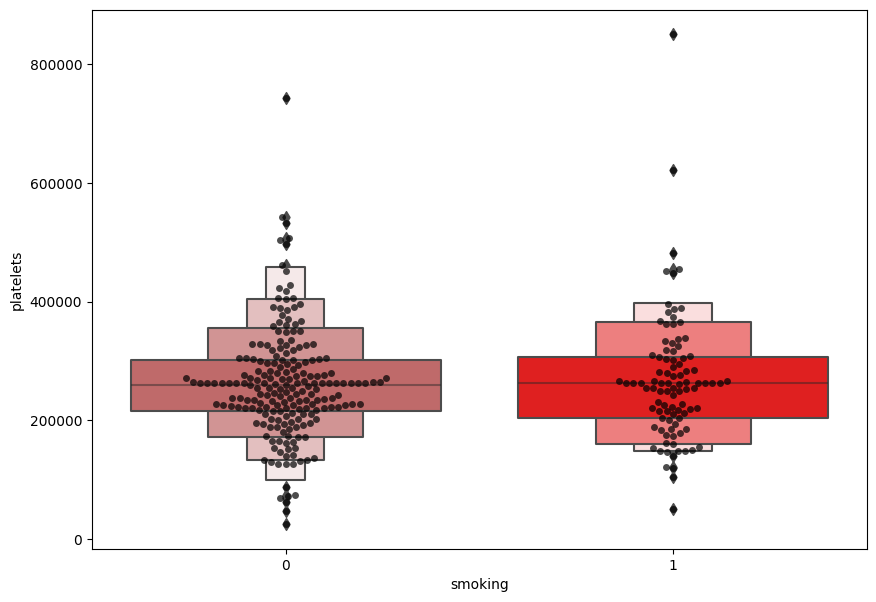

2023-02-24 10:51:13.263 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:13.270 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


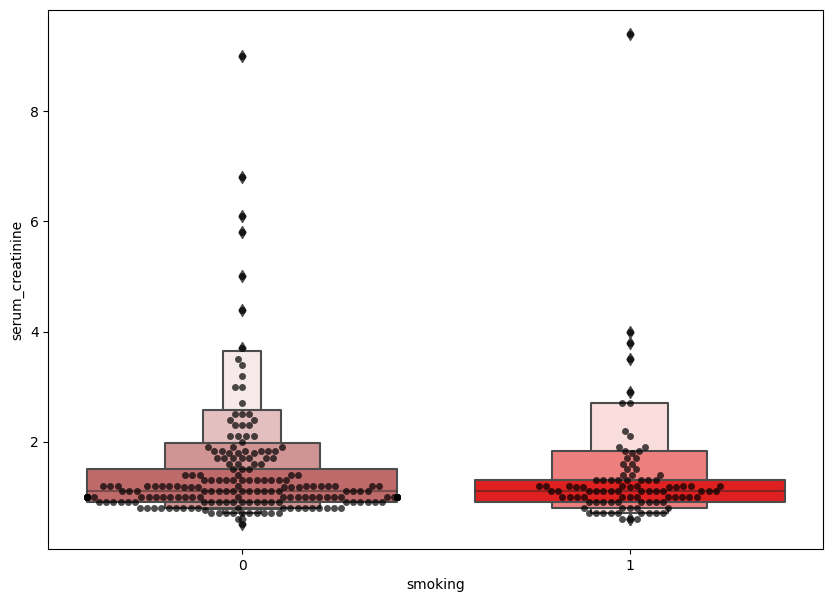

2023-02-24 10:51:14.042 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:14.050 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


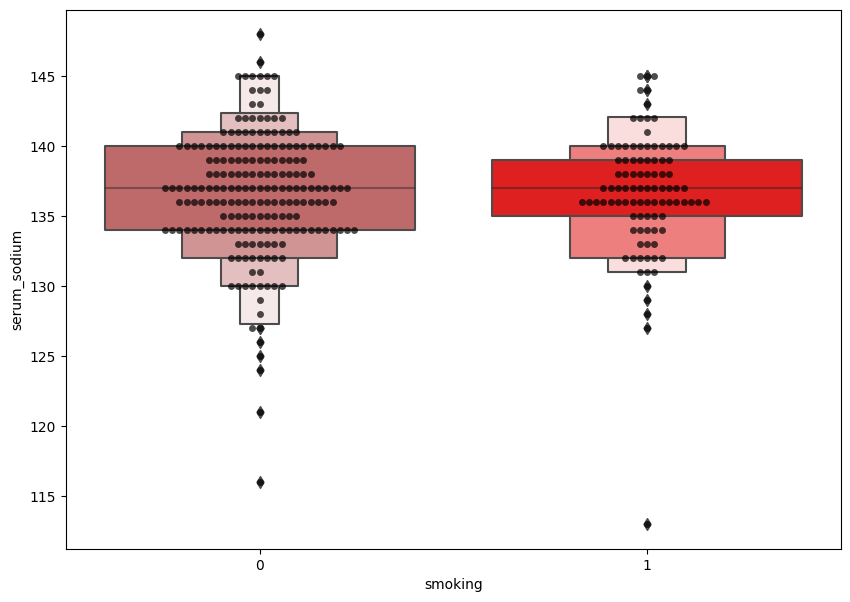

2023-02-24 10:51:14.499 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-02-24 10:51:14.504 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


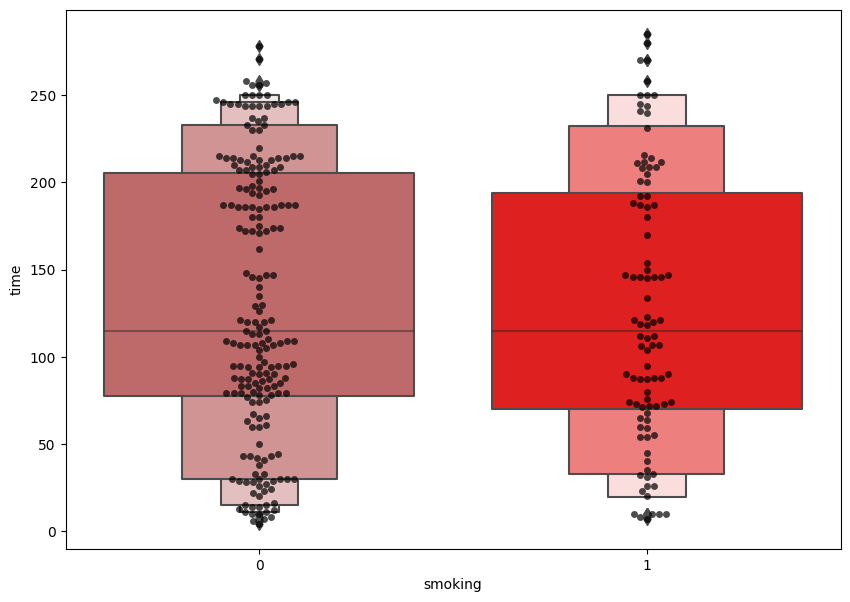

In [16]:
# Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.
feature = ["creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=df["smoking"], y=df[i], color="black", alpha=0.7)
    sns.boxenplot(x=df["smoking"], y=df[i], palette=cols)
    plt.show()

note:
Few Outliers can be seen in almost all the features
Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke.

In [17]:
##DATA PREPROCESSING
# Defining independent and dependent attributes in training and test sets
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [18]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [19]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

In [20]:
##Model building
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [21]:
#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [22]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [23]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [24]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [25]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
81,0,0
176,0,0
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [26]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.7777777777777778
Sigmoid kernel Accuracy: 0.8
rbf kernelAccuracy: 0.7888888888888889


In [27]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[51  9]
 [11 19]]
[[51  9]
 [ 9 21]]
[[51  9]
 [10 20]]


<AxesSubplot: >

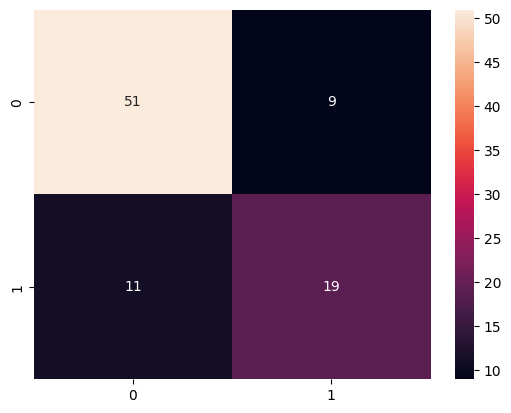

In [28]:
##Heatmap
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [29]:
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.70      0.70      0.70        30

    accuracy                           0.80        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



<AxesSubplot: >

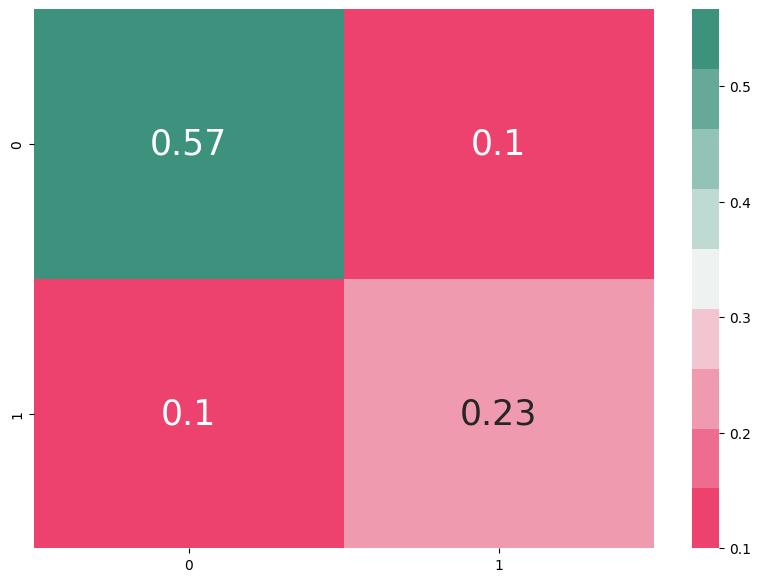

In [30]:
# Getting the confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred_sigmoid)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

## ANN MODEL


In [32]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 12))
## hidden layer
model.add(Dense(units= 10, kernel_initializer= 'uniform', activation = 'relu'))
## hidden layer
model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
#model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [65]:
## train the model
history = model.fit(X_train, y_train, batch_size = 100, epochs = 500, validation_split= 0.25)

Epoch 1/500
2/2 [==============================] - 0s 114ms/step - loss: 4.3044e-05 - accuracy: 1.0000 - val_loss: 2.0724 - val_accuracy: 0.8302
Epoch 2/500
2/2 [==============================] - 0s 41ms/step - loss: 4.2875e-05 - accuracy: 1.0000 - val_loss: 2.0729 - val_accuracy: 0.8302
Epoch 3/500
2/2 [==============================] - 0s 44ms/step - loss: 4.2708e-05 - accuracy: 1.0000 - val_loss: 2.0735 - val_accuracy: 0.8302
Epoch 4/500
2/2 [==============================] - 0s 40ms/step - loss: 4.2789e-05 - accuracy: 1.0000 - val_loss: 2.0738 - val_accuracy: 0.8302
Epoch 5/500
2/2 [==============================] - 0s 43ms/step - loss: 4.2713e-05 - accuracy: 1.0000 - val_loss: 2.0740 - val_accuracy: 0.8302
Epoch 6/500
2/2 [==============================] - 0s 43ms/step - loss: 4.2622e-05 - accuracy: 1.0000 - val_loss: 2.0741 - val_accuracy: 0.8302
Epoch 7/500
2/2 [==============================] - 0s 40ms/step - loss: 4.2394e-05 - accuracy: 1.0000 - val_loss: 2.0742 - val_accuracy

In [66]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

3/3 [==============================] - 0s 2ms/step


In [67]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 83.02%


In [68]:
filename = 'heartdisease_model.pkl'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-24 16:33:33         2379
metadata.json                                  2023-02-24 16:33:33           64
variables.h5                                   2023-02-24 16:33:33        31384


In [69]:
print(y_test.shape)
print(y_pred_ann.shape)

(90,)
(90, 1)


In [70]:
y_pred_ann = y_pred_ann.flatten()

In [71]:
print(y_test.shape)
print(y_pred_ann.shape)

(90,)
(90,)


In [72]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
81,0,0
176,0,1
121,0,0
87,0,0
239,0,0
...,...,...
134,0,1
0,1,1
293,0,0
153,0,0


In [73]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        60
           1       0.51      0.60      0.55        30

    accuracy                           0.68        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.69      0.68      0.68        90



In [74]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[43, 17],
       [12, 18]], dtype=int64)

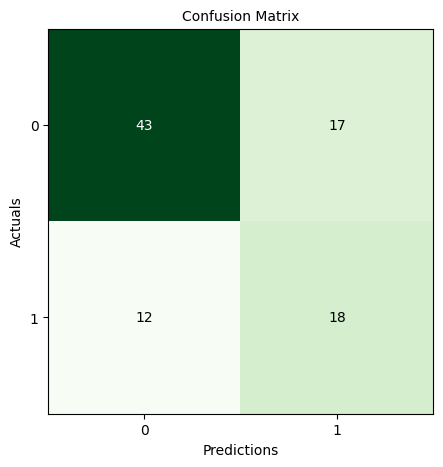

In [75]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [76]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.658333


In [77]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        60
           1       0.51      0.60      0.55        30

    accuracy                           0.68        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.69      0.68      0.68        90

